# Heart Disease Prediction

## About Dataset

This dataset contains the medical history of **270** patients having and not having heart disease. It is a binary classification dataset.

## Source

This is a UCI dataset is present in Kaggle,
> https://www.kaggle.com/datasets/utkarshx27/heart-disease-diagnosis-dataset/data

## Data Dictionary

* **age**: Numerical Data. This represents the age of the patients.     
* **sex**: Binary Data. This represents the gender of patients. O = Female and 1 = Male.
* **chest pain type**: Categorical Data. This represents 4 types of chest pain of patients.      
* **resting blood pressure**: Numerical Data. This represents the blood pressure(BP) of patients at resting.  
* **serum cholestoral**: Numerical Data. This represents the cholestorol level (in mg/dl) of patients.     
* **fasting blood sugar**: Binary Data. This represents whether the patients have fasting blood sugar level more than 120 mg/dl or not. 0 = < 120 mg/dl and 1 = > 120 mg/dl       
* **resting electrocardiographic results**: Categorical Data. This represents the electrocardiographic results of patients at resting. Values can be 0,1 and 2.
* **maximum heart rate achieved**: Numerical Data. This represents the maximum heart rate achieved by the patients.
* **exercise induced angina**: Binary Data. This represents whether the patiens have angina(chest pain) during excercise or not. 0 = No angina and 1 = presence of angina.    
* **oldpeak**: Numeric Data. This represents ST depression induced by exercise relative to rest for the patients.
* **ST segment**: Categorical Ordered Data.This represents the slope of the peak exercise ST segment for the patients. Values are 1,2 and 3.
* **major vessels**: Numerical Data. This represents the number of major vessels colored by flourosopy for the patients. Values are 0 - 3.
* **thal**: Categorical Data. The thalassemia level in blood of patients. 3 = normal; 6 = fixed defect; 7 = reversable defect.
* **Target**: This the the target variable that represents whether the patient has heart disease or not. 1 = Absence  of heart disease and 2 = Presence of heart disease.

## Problem Satement

* Perform an in-depth Exploratory Data Analysis on the Heart Disease Prediction dataset, uncovering insights, patterns, and relationships within the data.


### Install Necessary Libraries

In [1]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 23.5 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13166 sha256=29637e0ad7c20a3f66f279c74895a440b656ba5e32ffb4d09d0d950646f0d9e2
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


### Load Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from scipy import stats
import ppscore as pps
from sklearn.ensemble import IsolationForest

### Necessary Settings

In [2]:
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

### Load Dataset

In [39]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/dscourse/heart-disease-detection"
file_path = os.path.join(folder_path, "dataset_heart.csv")
df = pd.read_csv(file_path)

### General Information

In [4]:
# Show 1st 5 rows
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [5]:
# Shape of data
print(f"Number of samples in dataset are **{df.shape[0]}** with **{df.shape[1]}** features.")

Number of samples in dataset are **270** with **14** features.


In [6]:
# Data types of features
df.dtypes

age                                       int64
sex                                       int64
chest pain type                           int64
resting blood pressure                    int64
serum cholestoral                         int64
fasting blood sugar                       int64
resting electrocardiographic results      int64
max heart rate                            int64
exercise induced angina                   int64
oldpeak                                 float64
ST segment                                int64
major vessels                             int64
thal                                      int64
heart disease                             int64
dtype: object

In [7]:
# Detect missing or null values

if df.isnull().sum().sum() > 0:
  print(df.isnull().sum())
else:
  print("There is **no missing** value present in the dataset.")

There is **no missing** value present in the dataset.


In [8]:
# Check presence of duplicate rows.
if df.duplicated().sum() == 0:
  print("**No duplicate** row present in the dataset.")
elif df.duplicated().sum() == 1:
  print("**1 duplicate** row present in the dataset.")
else:
  print(f"**{df.duplicated().sum()} duplicate** rows present in the dataset.")

**No duplicate** row present in the dataset.


### Univariate Analysis

Analysis of each feature present in the dataset.

In [9]:
# Distribution of each numerical feature
num_features = [
    "age",
    "resting blood pressure",
    "serum cholestoral",
    "max heart rate",
    "oldpeak",
    "major vessels"
]

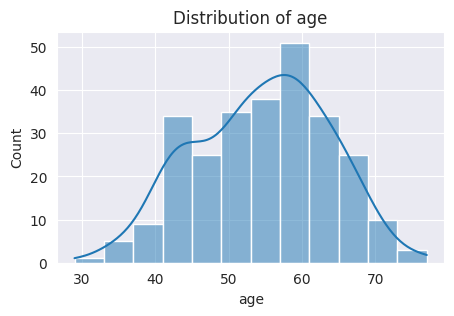

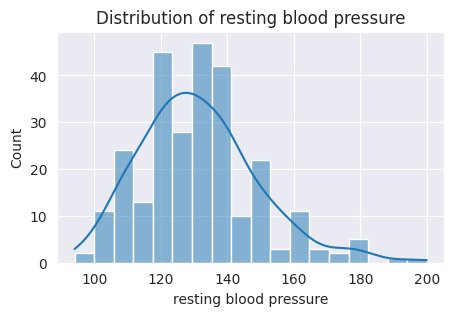

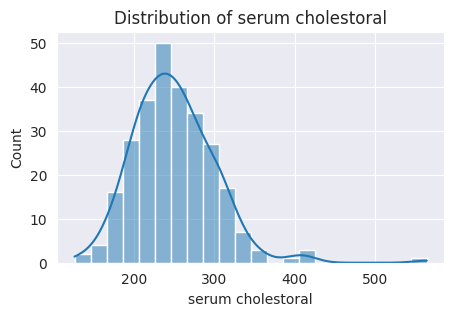

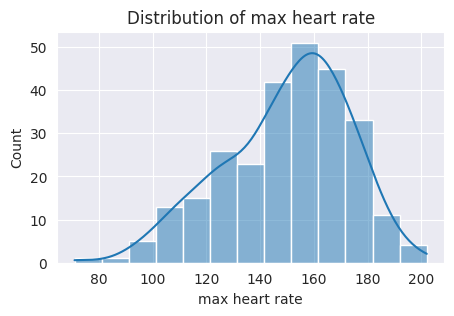

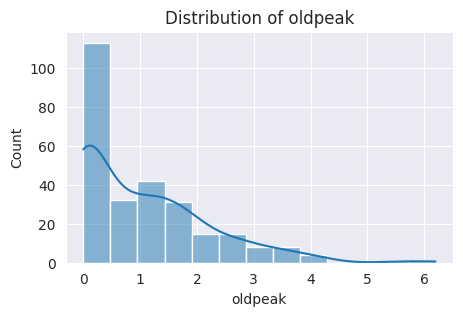

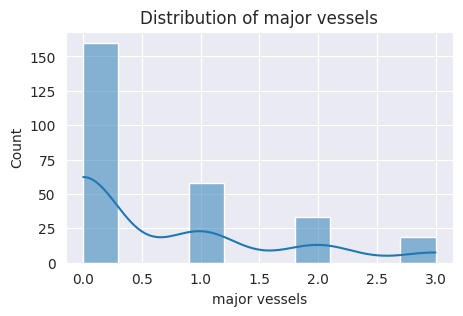

In [10]:
# Histogram Analysis
for col in num_features:
  plt.figure(figsize=(5, 3))
  sns.histplot(data=df, x= col, kde= True)
  plt.title(f"Distribution of {col}")

In [11]:
# Find the type of distribution of each numerical feature using Kolmogorov-Smirnov test
# This is a statistical hytpthesis test to check the distribution of a feature is
# Normal, Exponential, Log-Normal, Uniform or other.

for col in num_features:
  # Normal Distribution
  found = False
  result = stats.kstest(df[col], 'norm', args=(np.mean(df[col]), np.std(df[col])))
  if result.pvalue > 0.05:
    print(f"The distribution of **{col}** is normal.")
    found = True
  if not found:
   # Uniform Distribution
    result = stats.kstest(df[col], "uniform", args=(0, 1))
    if result.pvalue > 0.05:
      print(f"The distribution of **{col}** is uniform.")
      found = True
  if not found:
    # Exponential Distribution
    loc, scale = stats.expon.fit(df[col])
    result = stats.kstest(df[col], "expon", args=(loc, scale))
    if result.pvalue > 0.05:
      print(f"The distribution of **{col}** is exponential.")
      found = True
  if not found:
    # Other Distribution
    print(f"The distributionof **{col}** is other.")


The distribution of **age** is normal.
The distributionof **resting blood pressure** is other.
The distribution of **serum cholestoral** is normal.
The distribution of **max heart rate** is normal.
The distributionof **oldpeak** is other.
The distributionof **major vessels** is other.


In [12]:
# Plot Proportion of Categorical and Binary Features
cat_features = [
    "sex ",
    "chest pain type",
    "fasting blood sugar",
    "resting electrocardiographic results",
    "exercise induced angina",
    "ST segment",
    "thal"
]

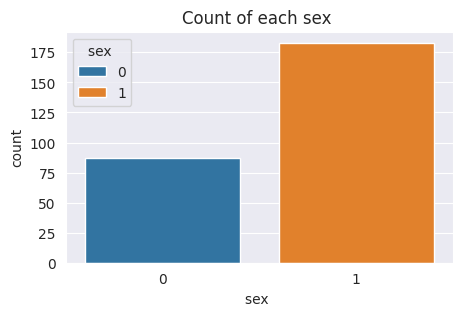

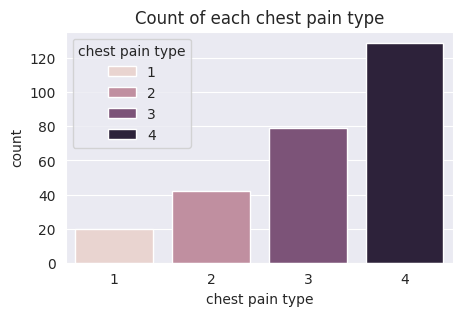

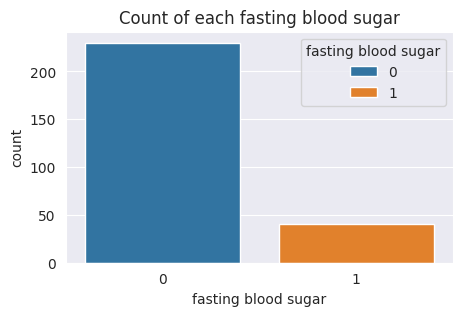

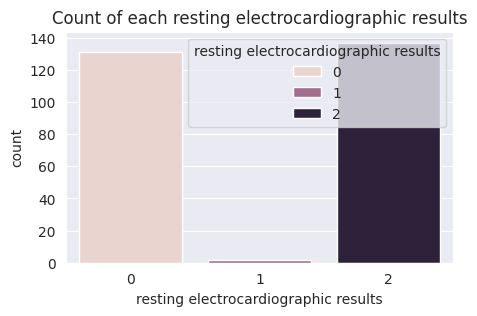

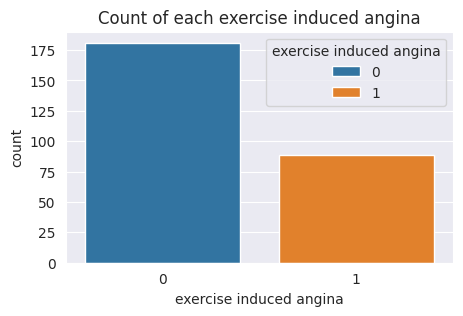

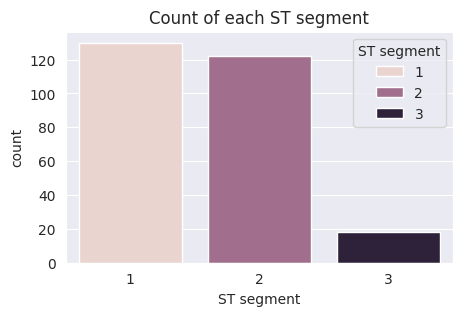

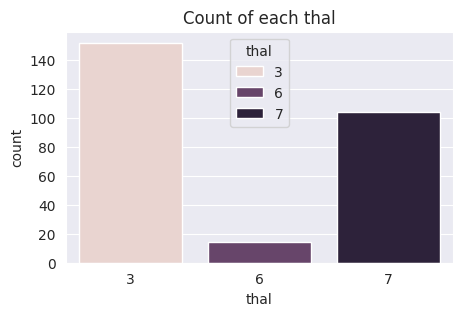

In [13]:
# Count Plot
for col in cat_features:
  plt.figure(figsize=(5, 3))
  sns.countplot(data=df, x= col, hue=col)
  plt.title(f"Count of each {col}")

In [14]:
#  Value counts of each target type
df["heart disease"].value_counts()

1    150
2    120
Name: heart disease, dtype: int64

Text(0.5, 1.0, 'Count of heart disease')

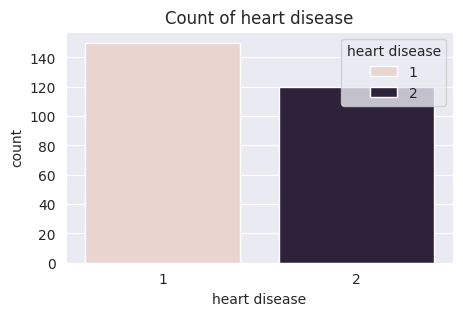

In [15]:
# Count plot target
plt.figure(figsize=(5,3))
sns.countplot(data=df, x= "heart disease", hue= "heart disease")
plt.title("Count of heart disease")

### Outlier Detection

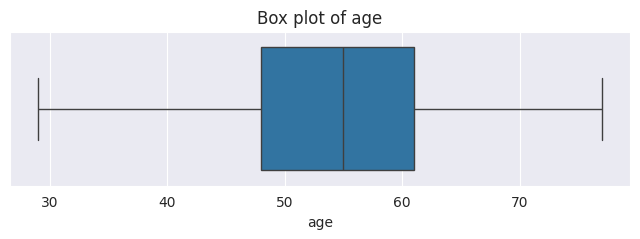

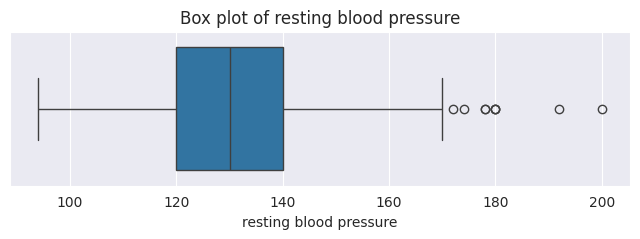

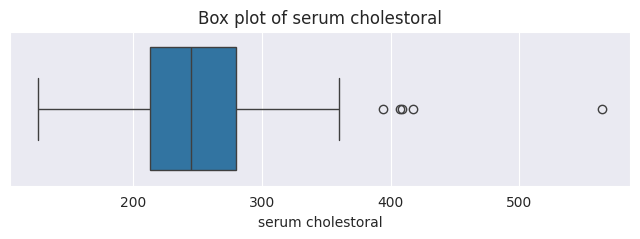

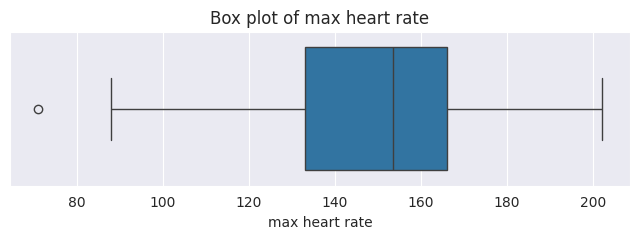

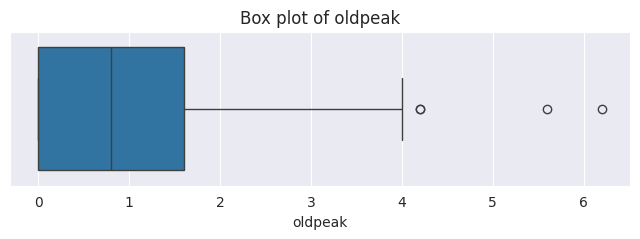

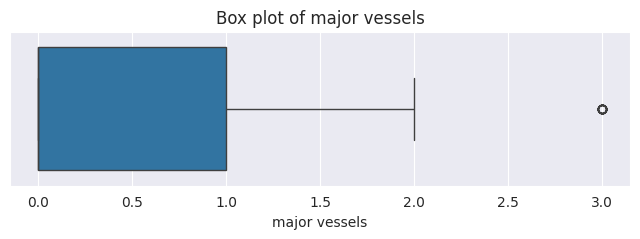

In [16]:
# Visuallize with box plot
for col in num_features:
  plt.figure(figsize= (8,2))
  sns.boxplot(data= df, x= col)
  plt.title(f"Box plot of {col}")

In [17]:
# Outlier detection using Isolation Forest
iso_f = IsolationForest(contamination= 0.1, random_state= 42)
# Train the model
iso_f.fit(df)

IsolationForest(contamination=0.1, random_state=42)

In [18]:
# Predict outliers(-1 for outliers, 1 for inliers)
df_o = df.copy()
df_o["outlier"] = iso_f.predict(df)
outliers = df_o[df_o["outlier"] == -1].shape[0]
print(f"From Isolation Forest analysis it is found that there are **{outliers}** rows in the sample.")

From Isolation Forest analysis it is found that there are **27** rows in the sample.


### Correlation Analysis

In [19]:
# Check Linear relation among the features
corr_features = num_features.append("heart disease")
corr = df[num_features].corr().round(2)
corr

,age,resting blood pressure,serum cholestoral,max heart rate,oldpeak,major vessels,heart disease
age,1.00,0.27,0.22,-0.40,0.19,0.36,0.21
resting blood pressure,0.27,1.00,0.17,-0.04,0.22,0.09,0.16
serum cholestoral,0.22,0.17,1.00,-0.02,0.03,0.13,0.12
max heart rate,-0.40,-0.04,-0.02,1.00,-0.35,-0.27,-0.42
oldpeak,0.19,0.22,0.03,-0.35,1.00,0.26,0.42
major vessels,0.36,0.09,0.13,-0.27,0.26,1.00,0.46
heart disease,0.21,0.16,0.12,-0.42,0.42,0.46,1.00


<Axes: >

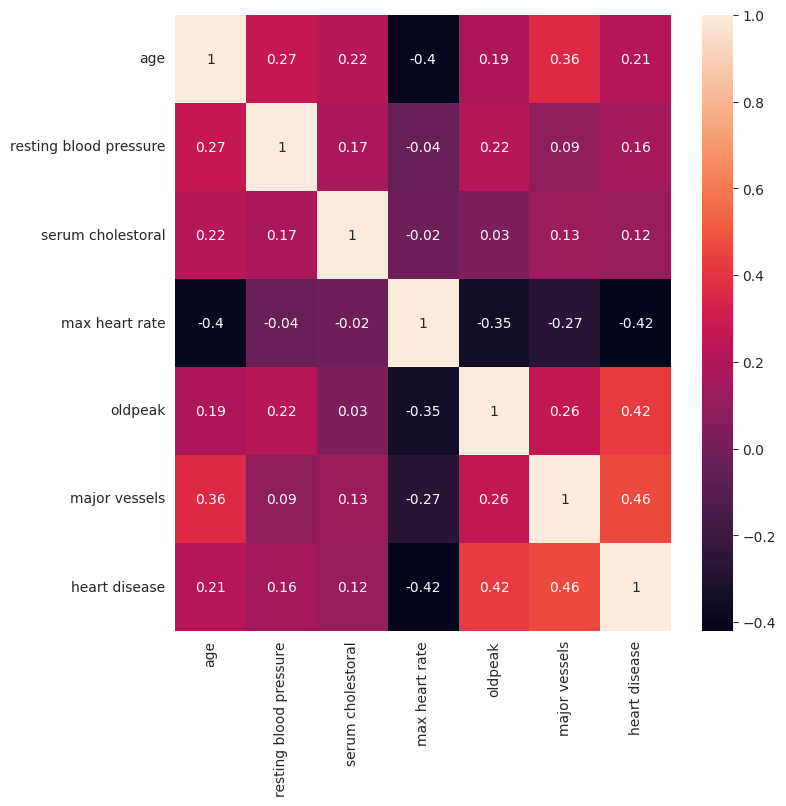

In [20]:
# Plot heatmap for visualize the correlation
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot= True)

In [21]:
# Find Predictive Power Score among the features which helps us to find non-linear correlation
# or complex relations among the features
pps_matrix = pps.matrix(df)
print(pps_matrix)


                 x                       y   ppscore            case  \
0              age                     age  1.000000  predict_itself   
1              age                    sex   0.000000      regression   
2              age         chest pain type  0.000000      regression   
3              age  resting blood pressure  0.000000      regression   
4              age       serum cholestoral  0.000000      regression   
..             ...                     ...       ...             ...   
191  heart disease                 oldpeak  0.091188      regression   
192  heart disease              ST segment  0.102965      regression   
193  heart disease           major vessels  0.030915      regression   
194  heart disease                    thal  0.178675      regression   
195  heart disease           heart disease  1.000000  predict_itself   

     is_valid_score               metric  baseline_score  model_score  \
0              True                 None        0.000000     1

In [22]:
pps_matrix_filtered = pps_matrix[(pps_matrix["ppscore"] > 0.2) & (pps_matrix["x"] != pps_matrix["y"])]
pps_matrix_filtered

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
136,oldpeak,ST segment,0.290418,regression,True,mean absolute error,0.548148,0.388956,DecisionTreeRegressor()


In [23]:
pps_cols = []

for col in df.columns:
  if col != 'heart disease':
    # Not target column find PP Score for each column with target
    ppcol = pps.score(df, col, "heart disease")
    # If PP Score is more than 0.2 this coulmn has some pridictive power
    if(ppcol["ppscore"] > 0.2):
      pps_cols.append(col)
if len(pps_cols) > 0:
  print(f"**{pps_cols}** have power to predict target.")
else :
  print("**None** of the feature has such predictive poer score to predict the target.")

**None** of the feature has such predictive poer score to predict the target.


### Bivariate Analysis

heart disease         1         2
sex                              
0              0.770115  0.229885
1              0.453552  0.546448
heart disease           1         2
chest pain type                    
1                0.750000  0.250000
2                0.833333  0.166667
3                0.784810  0.215190
4                0.294574  0.705426
heart disease               1         2
fasting blood sugar                    
0                    0.552174  0.447826
1                    0.575000  0.425000
heart disease                                1         2
resting electrocardiographic results                    
0                                     0.648855  0.351145
1                                     0.500000  0.500000
2                                     0.467153  0.532847
heart disease                   1         2
exercise induced angina                    
0                        0.701657  0.298343
1                        0.258427  0.741573
heart disease         1    

<Figure size 500x300 with 0 Axes>

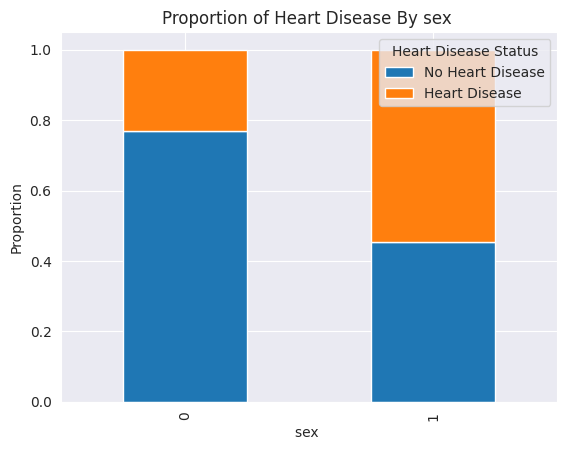

<Figure size 500x300 with 0 Axes>

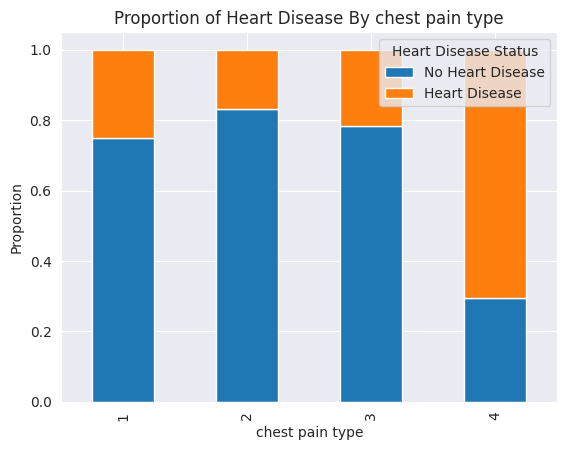

<Figure size 500x300 with 0 Axes>

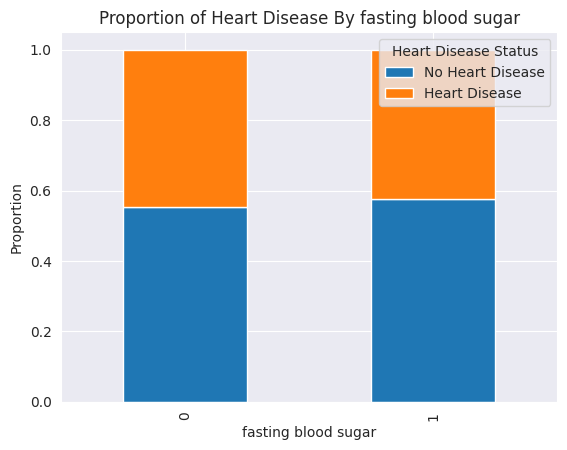

<Figure size 500x300 with 0 Axes>

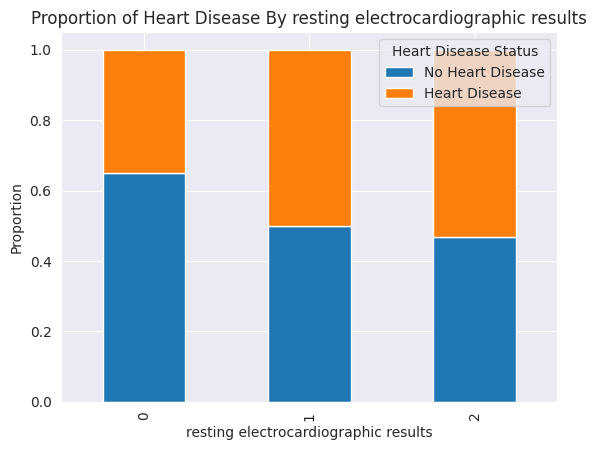

<Figure size 500x300 with 0 Axes>

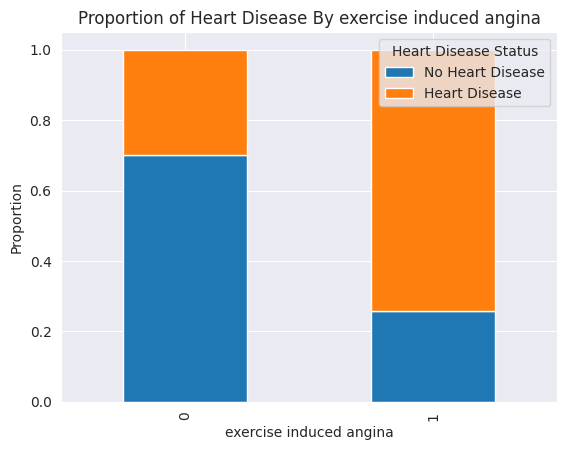

<Figure size 500x300 with 0 Axes>

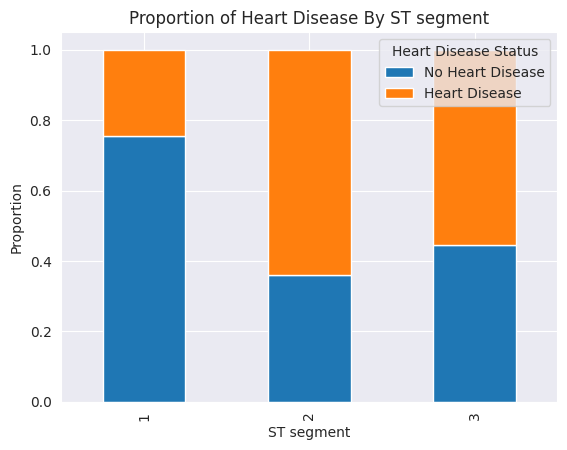

<Figure size 500x300 with 0 Axes>

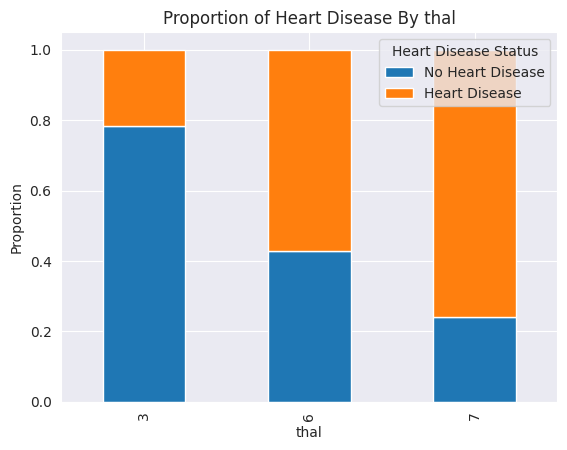

In [24]:
# Count plot for categorical features for the patient having heart disesse.
for col in cat_features:
#   plt.figure(figsize=(5, 3))
#   sns.countplot(data=df[df["heart disease"] == 2], x= col, hue=col, palette="rainbow")
#   plt.title(f"Count of each {col} for patients having heart disease.")
  grouped_data = df.groupby([col, "heart disease"]).size().unstack()
  # Calculate proportions
  proportions = grouped_data.div(grouped_data.sum(axis=1), axis= 0)
  print(proportions)
  # Plot Data
  plt.figure(figsize=(5, 3))
  # Stacked Bar Chart
  proportions.plot(kind= "bar", stacked= True)
  plt.title(f"Proportion of Heart Disease By {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Proportion")
  plt.legend(["No Heart Disease", "Heart Disease"], title="Heart Disease Status")




Text(0, 0.5, 'Proportion')

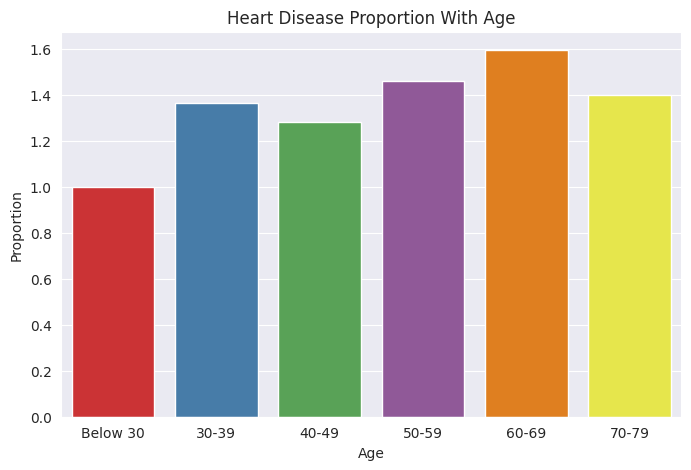

In [49]:
# Bin age into categories
bins = [18, 30, 40, 50, 60, 70, 80]
# Add Bin labels
bin_labels = ["Below 30", "30-39", "40-49", "50-59", "60-69", "70-79"]
df["age group"] = pd.cut(df["age"], bins= bins, labels= bin_labels, right= False)
grouped_df = df.groupby("age group")["heart disease"].mean().reset_index()

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(data= grouped_df, x="age group", y="heart disease", hue="age group", palette="Set1")
plt.title("Heart Disease Proportion With Age")
plt.xlabel("Age")
plt.ylabel("Proportion")

Text(0, 0.5, 'Proportion')

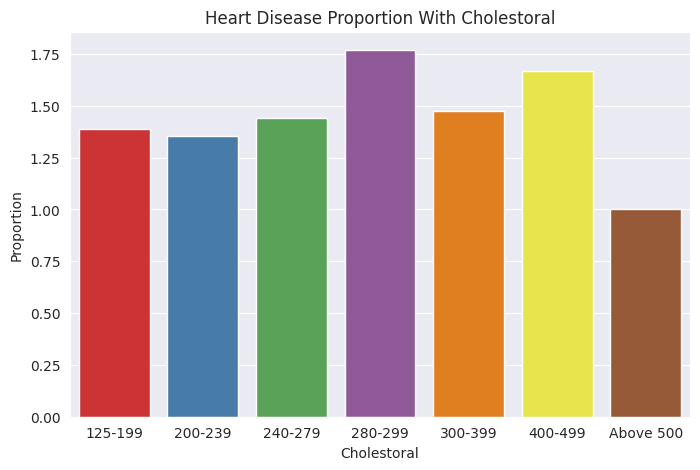

In [48]:
# Bin Cholestoral into categories
bins = [125, 199, 240, 280, 300, 400, 500, 600]
# Add Bin labels
bin_labels = ["125-199", "200-239", "240-279", "280-299", "300-399", "400-499", "Above 500"]
df["chol group"] = pd.cut(df["serum cholestoral"], bins= bins, labels= bin_labels, right= False)
grouped_df = df.groupby("chol group")["heart disease"].mean().reset_index()

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(data= grouped_df, x="chol group", y="heart disease", hue="chol group", palette="Set1")
plt.title("Heart Disease Proportion With Cholestoral")
plt.xlabel("Cholestoral")
plt.ylabel("Proportion")

Text(0, 0.5, 'Proportion')

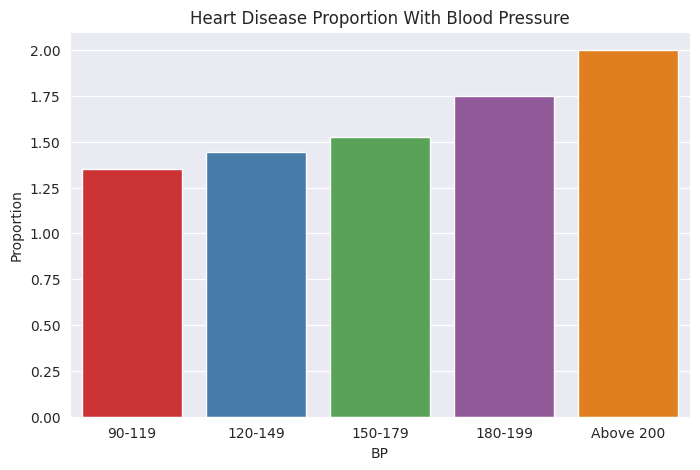

In [42]:
# Bin Blood Pressure into categories
bins = [90, 120, 150, 180, 200, 240]
# Add Bin labels
bin_labels = ["90-119", "120-149", "150-179", "180-199", "Above 200"]
df["resting blood pressure group"] = pd.cut(df["resting blood pressure"], bins= bins, labels= bin_labels, right= False)
grouped_df = df.groupby("resting blood pressure group")["heart disease"].mean().reset_index()

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(data= grouped_df, x="resting blood pressure group", y="heart disease", hue="resting blood pressure group", palette="Set1")
plt.title("Heart Disease Proportion With Blood Pressure")
plt.xlabel("BP")
plt.ylabel("Proportion")

Text(0, 0.5, 'Proportion')

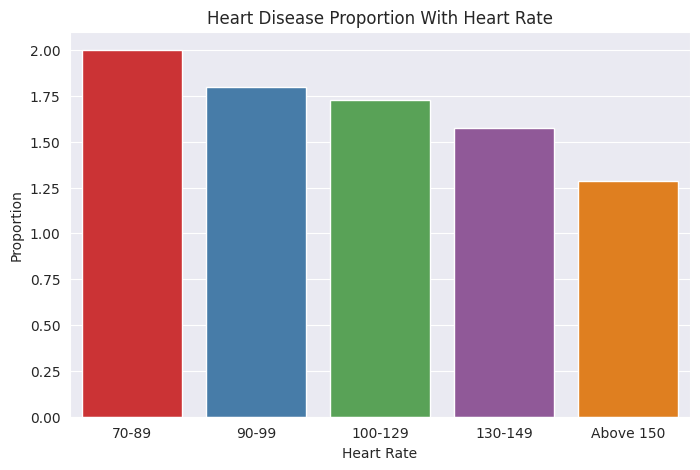

In [45]:
# Bin max heart rate into categories
bins = [70, 90, 100, 130, 150, 200]
# Add Bin labels
bin_labels = ["70-89", "90-99", "100-129", "130-149", "Above 150"]
df["max heart rate group"] = pd.cut(df["max heart rate"], bins= bins, labels= bin_labels, right= False)
grouped_df = df.groupby("max heart rate group")["heart disease"].mean().reset_index()

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(data= grouped_df, x="max heart rate group", y="heart disease", hue="max heart rate group", palette="Set1")
plt.title("Heart Disease Proportion With Heart Rate")
plt.xlabel("Heart Rate")
plt.ylabel("Proportion")

Text(0, 0.5, 'Proportion')

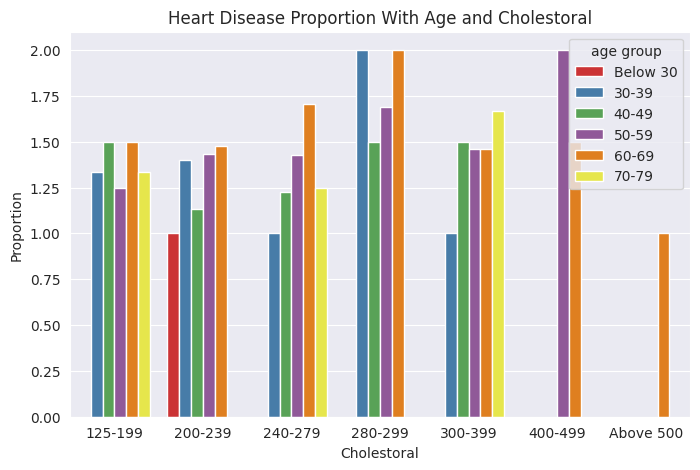

In [50]:
grouped_df = df.groupby(["age group", "chol group"])["heart disease"].mean().reset_index()

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(data= grouped_df, x="chol group", y="heart disease", hue="age group", palette="Set1")
plt.title("Heart Disease Proportion With Age and Cholestoral")
plt.xlabel("Cholestoral")
plt.ylabel("Proportion")

## Insights

* General Information

    1. Number of samples in dataset are **270** with **14** features.
    2. Datatypes of all features are encoded to numerical but it contains **6** numerical, **3** binary and **4** categorical features with a binary target feature.
    3. There is **no missing** value present in the dataset.
    4. **No duplicate** row present in the dataset.

* Analysis of Each Feature

    1. The distribution of **age** is normal.
    2. The distributionof **resting blood pressure** is other.
    3. The distribution of **serum cholestoral** is normal.
    4. The distribution of **max heart rate** is normal.
    5. The distributionof **oldpeak** is other.
    6. The distributionof **major vessels** is other.
    7. The number of **male** sample is fore than **female** in sex.
    8. Most of the samples have **chest pain type**  4.
    9. Most of the samples have **fasting blood sugar** level below 120.
    10. Most of the samples have **resting electrocardiographic results** 0 or 2.
    11. The number of samples not having **exercise induced angina** is more than having that.
    12. Most of the samples have **ST segment** 1 or 2.
    13. Most of the samples have **thal** 3 or 7.
    14. Count plot of target shows presence of both classes almost same. So it is a **balanced** dataset.
    15. From Box plot analysis of numeric features we found that except **age** all features contain outliers.
    16. From Isolation Forest analysis it is found that there are **27** rows in the sample.

* Analysis of Relationship of Each Feature with Target

    1. From Pearson's Correlation Analysis it is found that **oldpeak** and **major vessels** have modarate positive correlation with target. **max heart rate** hase modarate negetive correlation with target.
    2. From Pearson's Correlation Analysis it is also found that **age** has modarate negetige correlation with **max heart rate**.
    3. From Predictive Power Score Analysis we found that **None** of the feature has such predictive poer score to predict the target.
    4. From Proportion Analysis of categorical features we found,
        * **55%** male has heart disease whereas **23%** female has heart disease.
        * **71%** patients with chest pain type 4 has heart disease comapared to other chest pain type.
        * **44%** not having blood sugar > 120 mg/dl has heart disease whereas **42%** having blood sugar > 120 mg/dl has heart disease.
        * resting electrocardiographic results having 1 & 2 has **50%** and **53%** heart disease.
        * **70%** patients having exercise induced angina has heart disease.
        * ST segment having 2 & 3 has **64%** and **56%** heart disease.
        * thal having 6 & 7 has **64%** and **56%** heart disease.
    5. From Proportion Analysis of age with heart disease it is found that most number patients age between **60-69** has heart disease.
    6. From Proportion Analysis of cholestoral with heart disease it is found that patients having high choleastoral having heart disease. Most number patients h
    6. From Proportion Analysis of blood pressure with heart disease it is found that patients having high blood pressure having heart disease. Most number patients having cholestoral level between **above 200** has heart disease.
    7. From Proportion Analysis of max.heart rate with heart disease it is found that it is inversely porportional with heart disease. Most number patients having max. heart rate level between **70-89** has heart disease.
    8. Above **30 years** of age **high** cholestoral indicates chanche of heart disease.




